# Vamos a ver un ejemplo de análisis descriptivo con el dataset IRIS

Importamos las librerías que vamos a utilizar

In [0]:
import numpy as np 
import scipy as sc
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.datasets import load_iris
from math import pi
from pandas.plotting import scatter_matrix
from pandas.plotting import andrews_curves


Subimos el dataset donde lo tengamos, en nuestro caso lo tenemos en Drive o Local.
Pasos para subir desde un directorio local:


1.   En el menú de la izquierda click en Archivos.
2.   Click en Subir.
3.   Buscar el archivo y seleccionarlo.



In [0]:
iris=pd.read_csv('./Iris.csv')
#iris es ahora un objeto DataFrame de Pandas

Ahora vamos a hacernos las primeras preguntas:


1.   ¿Cuántos datos hay en el dataset?
2.   ¿Cuántas variables?
3.   ¿Cuántos grupos de variables o categorías?
4.   ¿Cuántas observaciones corresponden a cada grupo?

In [0]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [0]:
print(iris.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [0]:
iris.shape

(150, 6)

Vamos a quitar la variable Id que no nos interesa.

In [0]:
iris_num=iris.drop("Id", axis=1)

In [0]:
iris_num.shape

(150, 5)

In [0]:
iris_num.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [0]:
iris_num['Species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

¿Qué medidas numéricas podemos obtener para describir los datos?

In [0]:
iris_num.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Gráficamente, ¿cómo podemos ver la cantidad de observaciones en cada grupo?

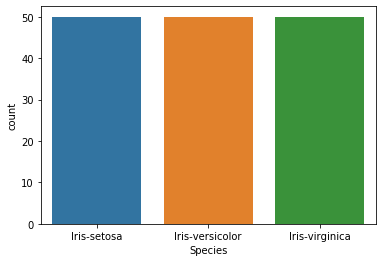

In [0]:
sns.countplot('Species',data=iris)
plt.show()

Veamos cómo hacer boxplots por grupos

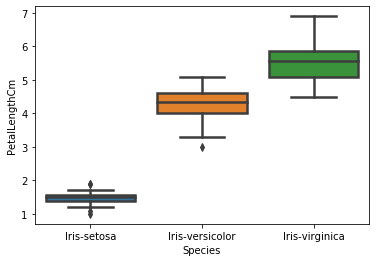

In [0]:
# Boxplots
sns.boxplot(x="Species", y="PetalLengthCm", data=iris  ,linewidth=2.5 )
plt.show()

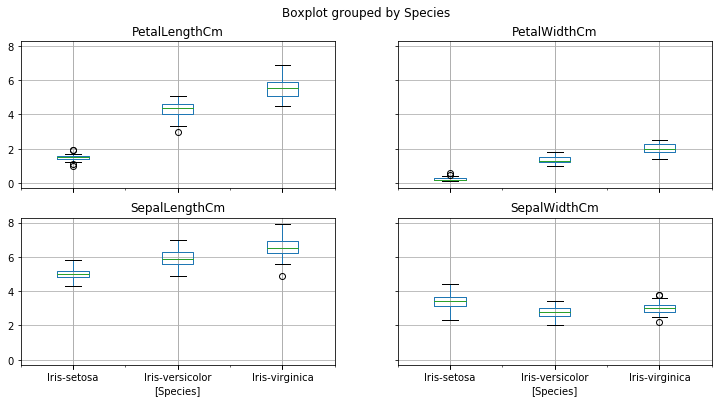

In [0]:
# Boxplots para cada variable divididos por grupos en "Species"
iris_num.boxplot(by="Species", figsize=(12, 6))
plt.show() #esto último se pone cuando no se quiere que salga el último mensaje informativo

Veamos cómo hacer histogramas por grupos

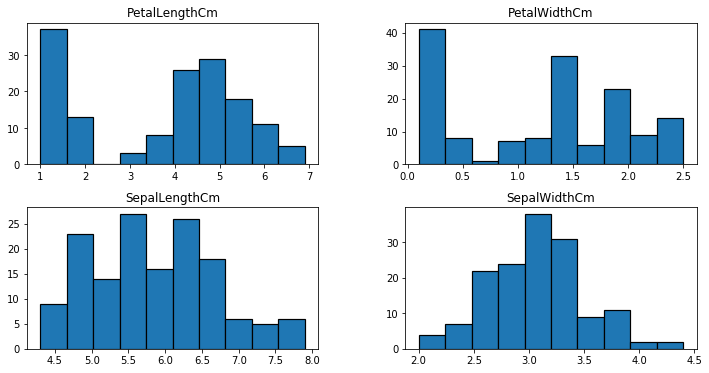

In [0]:
# Histogramas 
iris_num.hist(edgecolor='black', linewidth=1.2, grid=False, figsize=(12, 6))
plt.show()

# Otra forma de obtener los datos Iris es usar `sklearn`

In [0]:
# Histogramas divididos por subgrupos
# Otra forma de importar los datos de iris
from sklearn.datasets import load_iris
irissk = load_iris()

#irissk es ahora un numpy array 
X = irissk.data
Y = irissk.target


In [0]:
X.shape

(150, 4)

Con scipy(sc).stats podemos obtener medidas numéricas que describen las variables

In [0]:
sc.stats.describe(X)

DescribeResult(nobs=150, minmax=(array([4.3, 2. , 1. , 0.1]), array([7.9, 4.4, 6.9, 2.5])), mean=array([5.84333333, 3.05733333, 3.758     , 1.19933333]), variance=array([0.68569351, 0.18997942, 3.11627785, 0.58100626]), skewness=array([ 0.31175306,  0.31576711, -0.27212767, -0.10193421]), kurtosis=array([-0.57356795,  0.18097632, -1.39553589, -1.33606741]))

Histogramas por grupos 

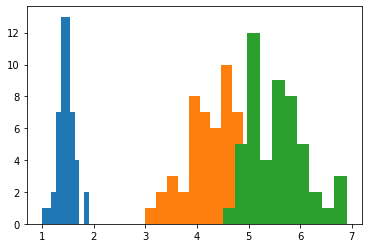

In [0]:
plt.hist(X[Y == 0,2])
plt.hist(X[Y == 1,2])
plt.hist(X[Y == 2,2])
plt.show()


Histogramas con transparencias

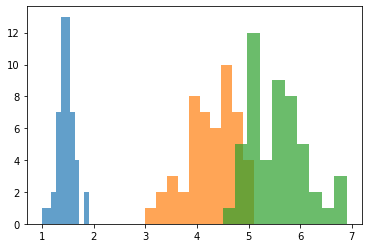

In [0]:
plt.hist(X[Y == 0,2],alpha=0.7)
plt.hist(X[Y == 1,2],alpha=0.7)
plt.hist(X[Y == 2,2],alpha=0.7)
plt.show()


Densidades kernels

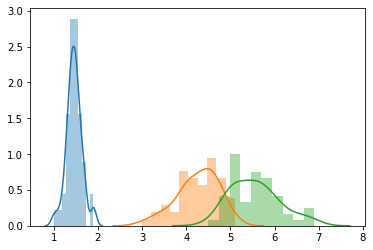

In [0]:
sns.distplot(X[Y == 0,2],bins=10)
sns.distplot(X[Y == 1,2],bins=10)
sns.distplot(X[Y == 2,2],bins=10)
plt.show()


KDE (Kernel density estimation) de una sola variable

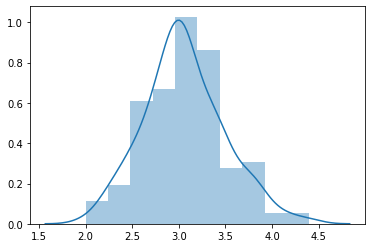

In [0]:
sns.distplot(X[:,1],bins=10)
plt.show()

Scatterplot

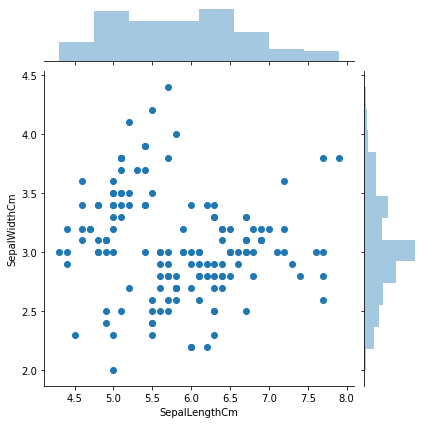

In [0]:
#Scatterplot donde salen también histogramas
fig=sns.jointplot(x='SepalLengthCm',y='SepalWidthCm',data=iris)

In [0]:
#Scatterplot en 3d y con movimiento
iris = px.data.iris()
fig = px.scatter_3d(iris, x='sepal_length', y='sepal_width', z='petal_width',
              color='species')
fig.show()

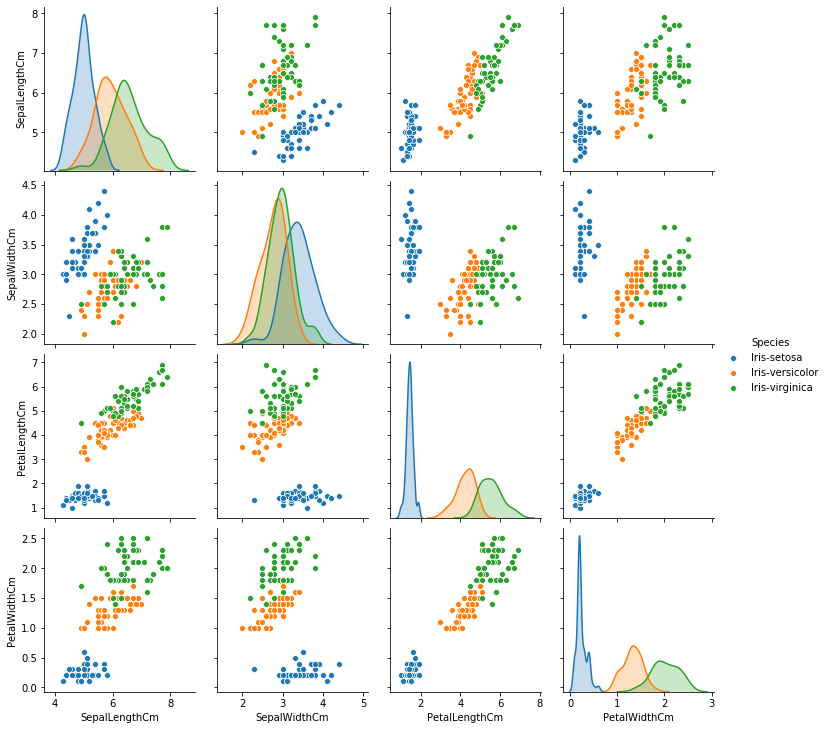

In [0]:
# Scatterplot matrix (kde en la diagonal)
sns.pairplot(iris_num,hue='Species')
plt.show()


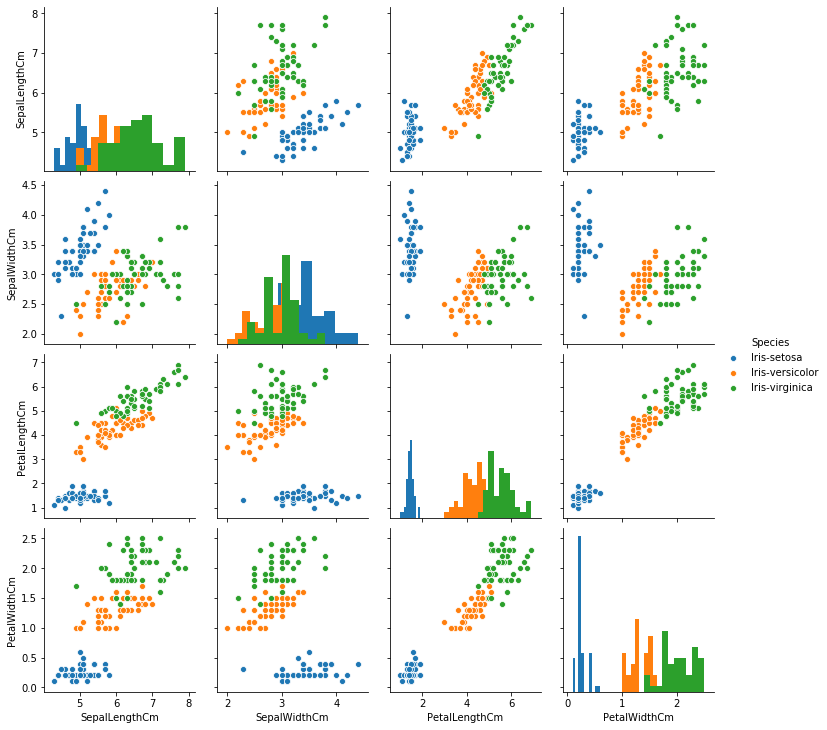

In [0]:
#Scatterplot matrix (histogramas en la diagonal)
sns.pairplot(iris_num,hue='Species', diag_kind='hist')
plt.show()

In [0]:
# Otra forma de cargar los datos IRIS (con seaborn - sns)
iris = sns.load_dataset("iris")
print(iris.head()) # no tiene variable Id, las demas vbles se llaman diferentes y las categorias tambien


   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


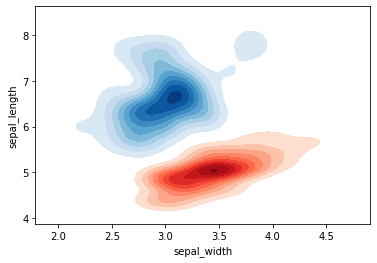

In [0]:
# Densidad kernel bidimensional
setosa = iris.loc[iris.species == "setosa"]
virginica = iris.loc[iris.species == "virginica"]
ax = sns.kdeplot(setosa.sepal_width, setosa.sepal_length,
                 cmap="Reds", shade=True, shade_lowest=False)
ax = sns.kdeplot(virginica.sepal_width, virginica.sepal_length,
               cmap="Blues", shade=True, shade_lowest=False)

Matriz de Covarianza
              sepal_length  sepal_width  petal_length  petal_width
sepal_length      0.685694    -0.042434      1.274315     0.516271
sepal_width      -0.042434     0.189979     -0.329656    -0.121639
petal_length      1.274315    -0.329656      3.116278     1.295609
petal_width       0.516271    -0.121639      1.295609     0.581006
Matriz de Correlaciones
              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000


(4.5, -0.5)

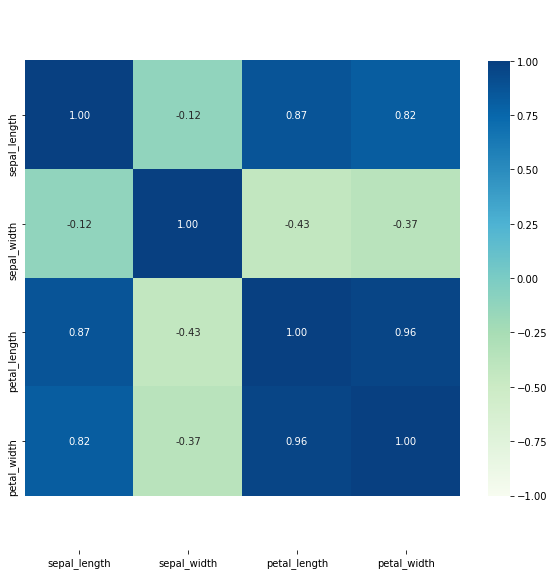

In [0]:
# Matriz de covarianza numerica 
cov_matrix = iris.cov()

# Matriz de correlaciones numerica 
correlation_matrix = iris.corr()
print('Matriz de Covarianza')
print(cov_matrix)
print('Matriz de Correlaciones')
print(correlation_matrix)

# Matriz de correlaciones gráfica 
plt.figure(figsize=(10,10))
ax=sns.heatmap(correlation_matrix,  vmax=1, vmin=-1,cbar_kws={"shrink": .8},square=True, annot=True,fmt='.2f', cmap ='GnBu',center=0)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)


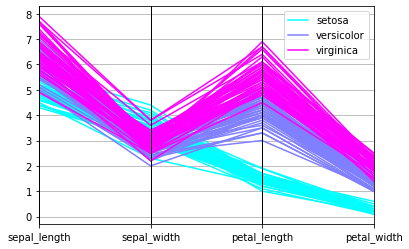

In [0]:
#Coordenadas paralelas
from pandas.plotting import parallel_coordinates
parallel_coordinates(iris, "species",colormap='cool')
plt.show()

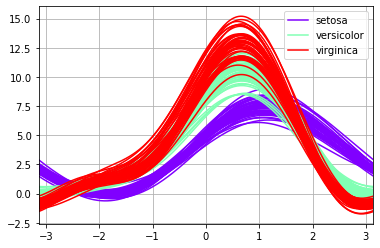

In [0]:
#Curvas de Andrews

andrews_curves(iris,"species",colormap='rainbow')
plt.show()
